# What fraction of matter in the Universe is bound in halos?

The fate of some matter is to fly across the Universe without friends, without falling into galaxies, without ever forming stars, forever cold, forever alone. 

On that happy thought, lets compute how much it is!

Basically we want to compute a ratio:

$ f = \frac{\mathrm{Mass~ bound}}{\mathrm{Total~ mass}}$

Bound matter that can gravitationally collapse and make galaxies is called halo. So all we need to do is compute the total mass in halos, and divide by the total mass in the Universe. Or some chunk of it.

So we take a cosmological simulation (here: SMDPL, https://www.cosmosim.org/cms/simulations/smdpl/). They have:

In [2]:
h = 0.6777                           # a scaling constant
simulation_volume   = (0.400 * h)**3 # Gpc^3

# the simulation is made from particles:
number_of_particles = 3840**3
particle_mass       = 9.63e7 * h     # solar masses

# so the total mass is:
M_total = number_of_particles * particle_mass
# and the density in a Gpc^3 is
rho_total = M_total / simulation_volume

print("total mass:", rho_total, "solar masses / Gpc^3")

total mass: 1.8550901308444842e+20 solar masses / Gpc^3


Now that we know some basics of the simulation, lets look at the halos.

Halos have a mass distribution, called the halo mass function.

In [3]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

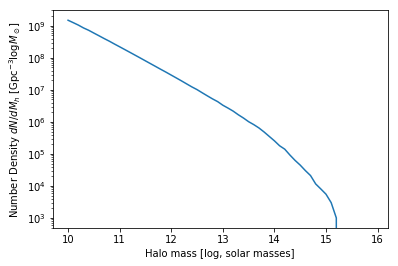

In [17]:
# import Halo mass function library
from hmf import get_hmf

# set a lower limit to look at
logMmin = 10.0
box = 'small'

# set a cosmic time 
z = 0 # now

# get Halo mass function:
Ms, rho = get_hmf(logMmin=logMmin, z=z, cumulative=False, box=box)
rho[~numpy.isfinite(rho)] = 0

plt.plot(Ms, rho, '-')
plt.xlabel('Halo mass [log, solar masses]')
plt.ylabel('Number Density $dN/dM_h$ [$\mathrm{Gpc}^{-3}\log M_\odot$]')
plt.yscale('log')

Beautiful. This is the number of halos. We count the mass inside these halos by multiplying the number with their mass:

Text(0,0.5,'Mass Density [$M_\\odot\\mathrm{Gpc}^{-3}\\log M_\\odot$]')

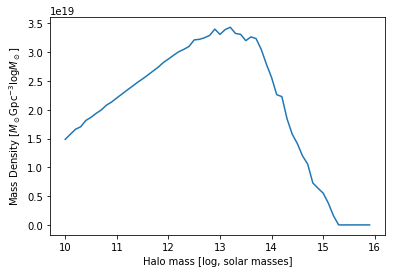

In [18]:
plt.plot(Ms, 10**Ms * rho, label='z=%.1f' % z)
plt.xlabel('Halo mass [log, solar masses]')
plt.ylabel('Mass Density [$M_\odot\mathrm{Gpc}^{-3}\log M_\odot$]')

Interesting! Most bound mass is in halos of $M_h \approx {10}^{13} M_\odot$!

(That's also good because the simulations cannot resolve very small masses < ${10}^{10} M_\odot$)

Finally, lets sum up the mass in halos:

In [19]:
rho_bound = numpy.trapz(x=Ms, y=10**Ms * rho)
print('Mass in halos: %.2e solar masses / Gpc^3' % rho_bound)

Mass in halos: 1.23e+20 solar masses / Gpc^3


And finally, we can compute our fraction:

In [20]:
print('fraction of bound matter: %.1f%%' % (100 * rho_bound / rho_total))

fraction of bound matter: 66.2%


There you have it! The rest is flying through space, not connected to anything.